In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from sklearn.metrics import confusion_matrix

In [2]:
from functions.data import load_samples_split

x_train, x_test, y_train, y_test = load_samples_split()

In [3]:
def plot_accuracy(h):
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


def plot_loss(h):
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


def plot_confusion(x, y):
    y_pred = model.predict(x_test)
    cm = confusion_matrix([np.argmax(a) for a in y_test], [np.argmax(a) for a in y_pred])
    df_cm = pd.DataFrame(cm, index=["Water", "Object"], columns=["Water", "Object"])
    plt.figure(figsize=(10, 7))
    sn.heatmap(df_cm, annot=True)

In [4]:
# final improved model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.2, epochs=150, verbose=False)

2021-12-15 16:50:49.127226: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-15 16:50:49.136363: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-15 16:50:49.136801: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-15 16:50:49.137909: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [5]:
model.evaluate(x_test, y_test, verbose=2)

34/34 - 0s - loss: 0.2688 - accuracy: 0.9409 - 74ms/epoch - 2ms/step


[0.2688441872596741, 0.9409005641937256]

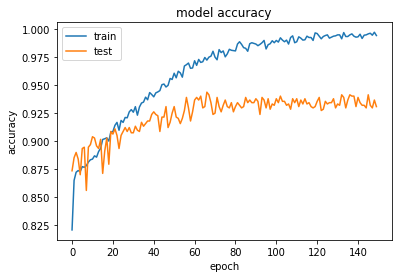

In [6]:
plot_accuracy(history)

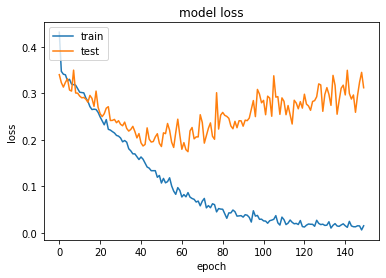

In [7]:
plot_loss(history)

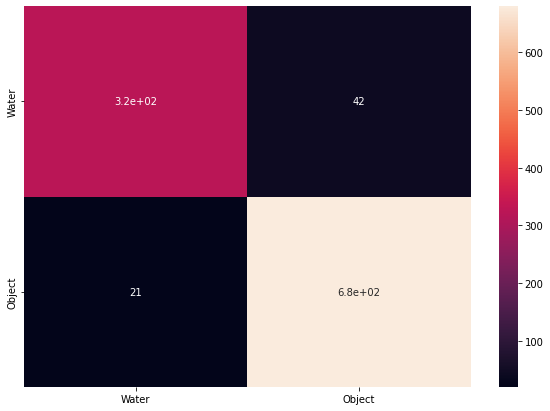

In [8]:
plot_confusion(x_test, y_test)

In [9]:
# model used throughout project
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.2, epochs=150, verbose=False)

In [10]:
model.evaluate(x_test, y_test, verbose=2)

34/34 - 0s - loss: 0.1711 - accuracy: 0.9578 - 60ms/epoch - 2ms/step


[0.17112047970294952, 0.9577861428260803]

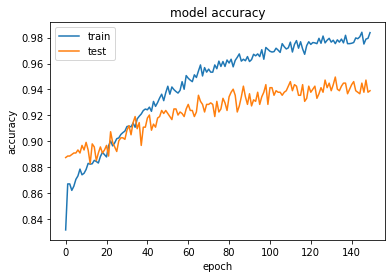

In [11]:
plot_accuracy(history)

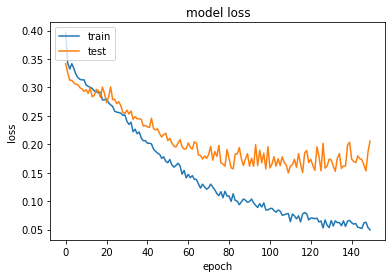

In [12]:
plot_loss(history)

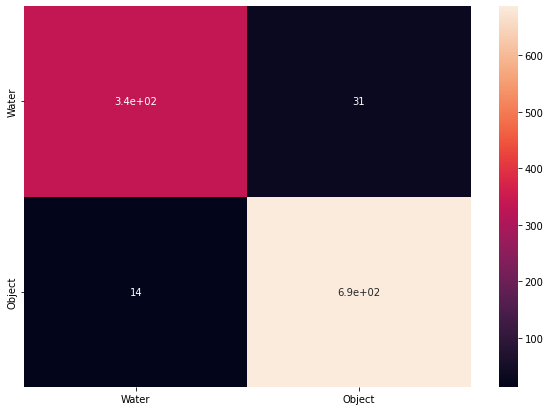

In [13]:
plot_confusion(x_test, y_test)

In [14]:
# experimental land model
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.2, epochs=150, verbose=False)

In [15]:
model.evaluate(x_test, y_test, verbose=2)

34/34 - 0s - loss: 0.5900 - accuracy: 0.9278 - 68ms/epoch - 2ms/step


[0.5899661779403687, 0.9277673363685608]

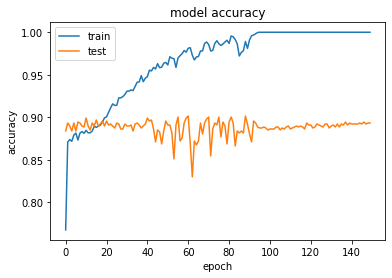

In [16]:
plot_accuracy(history)

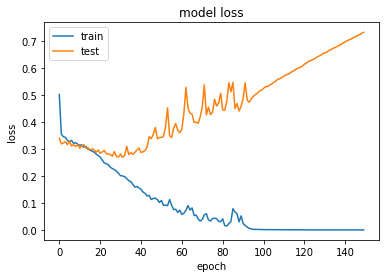

In [17]:
plot_loss(history)

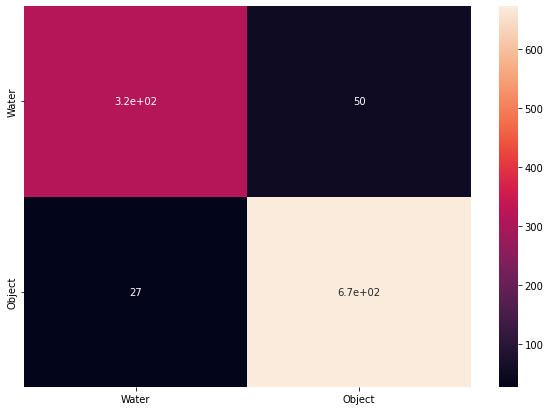

In [18]:
plot_confusion(x_test, y_test)